In [1]:
import os


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from math import radians, cos, sin, asin, sqrt
from datetime import datetime

In [3]:
train = pd.read_csv('C:/Users/Raj/Downloads/Data Mining/train.csv')
test = pd.read_csv('C:/Users/Raj/Downloads/Data Mining/test.csv')

# EDA

In [4]:

train.head() 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train.shape

(1458644, 11)

In [6]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:

test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [9]:
test.shape

(625134, 9)

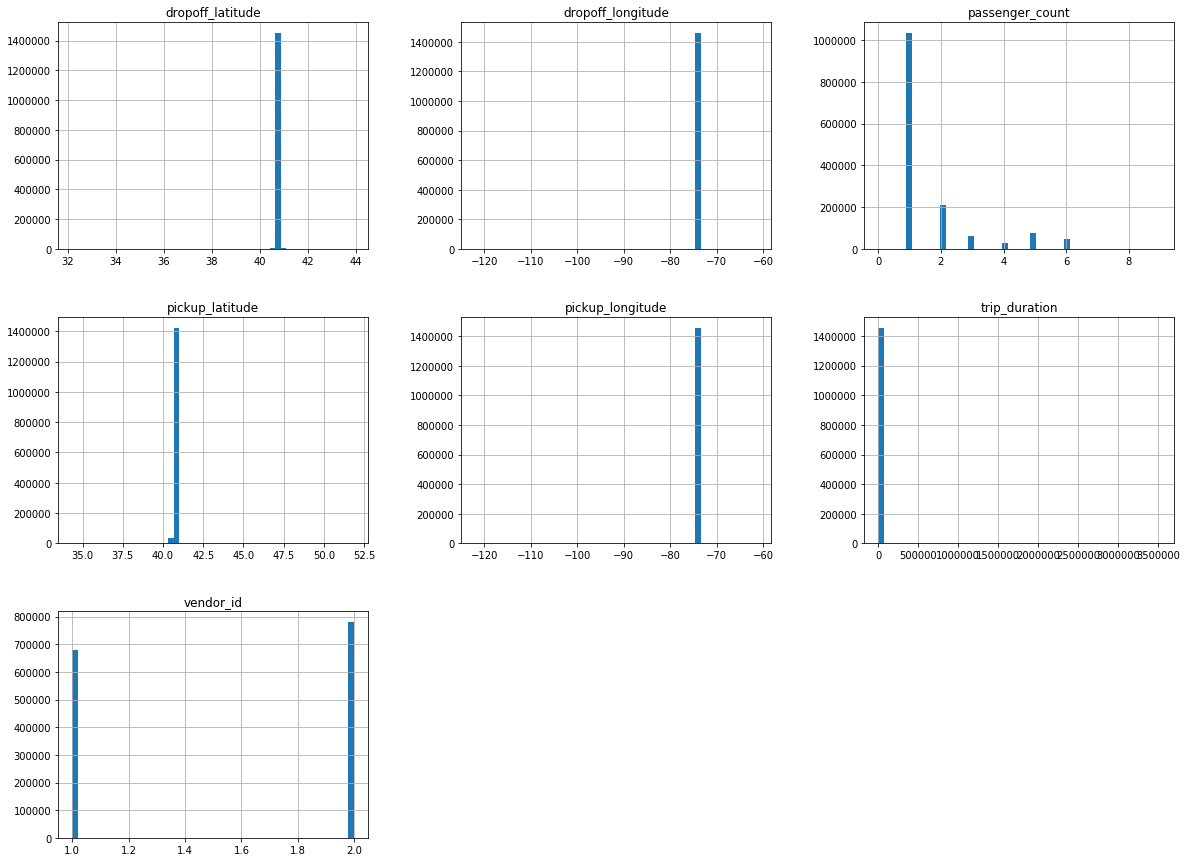

In [10]:
train.hist(bins=50, figsize=(20,15))
plt.show()

# Outlier Detection

In [11]:
print('----------------distance Outliers-------------------')
print('Latitude : {} to {}'.format(
    max(train.pickup_latitude.min(), train.dropoff_latitude.min()),
    max(train.pickup_latitude.max(), train.dropoff_latitude.max())
))
print('Longitude : {} to {}'.format(
    max(train.pickup_longitude.min(), train.dropoff_longitude.min()),
    max(train.pickup_longitude.max(), train.dropoff_longitude.max())
))
print('')
print('------------------Time Outliers---------------------')
print('Trip duration in seconds: {} to {}'.format(
    train.trip_duration.min(), train.trip_duration.max()))

print('')
print('------------------Date Outliers---------------------')
print('Datetime range: {} to {}'.format(train.pickup_datetime.min(), 
                                        train.dropoff_datetime.max()))
print('')
print('----------------Passengers Outliers------------------')
print('Passengers: {} to {}'.format(train.passenger_count.min(), 
                                        train.passenger_count.max()))


----------------distance Outliers-------------------
Latitude : 34.359695434570305 to 51.88108444213867
Longitude : -121.9333038330078 to -61.33552932739258

------------------Time Outliers---------------------
Trip duration in seconds: 1 to 3526282

------------------Date Outliers---------------------
Datetime range: 2016-01-01 00:00:17 to 2016-07-01 23:02:03

----------------Passengers Outliers------------------
Passengers: 0 to 9


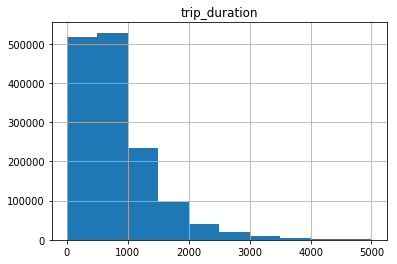

In [12]:
train.loc[train['trip_duration'] < 5000, 'trip_duration'].hist();

plt.title('trip_duration')
plt.show()

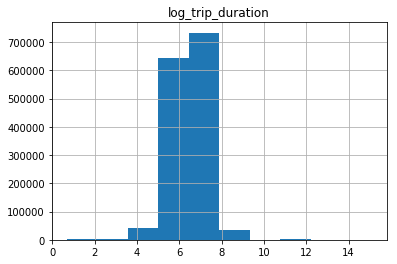

In [13]:
np.log1p(train['trip_duration']).hist();
plt.title('log_trip_duration')
plt.show()

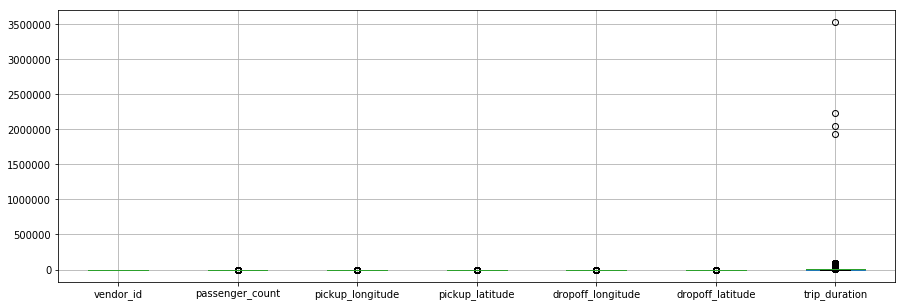

In [14]:
plt.subplots(figsize=(15,5))
train.boxplot(); 

In [22]:
train = train[(train.trip_duration < 5000)]

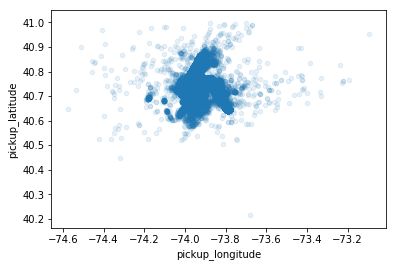

In [23]:
train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', alpha=0.1);

In [24]:
train = train.loc[(train['pickup_longitude'] > -75) & (train['pickup_longitude'] < -73)]
train = train.loc[(train['pickup_latitude'] > 40) & (train['pickup_latitude'] < 41)]

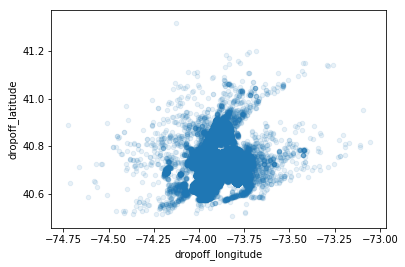

In [25]:
train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', alpha=0.1);

In [26]:
train = train.loc[(train['dropoff_longitude'] > -75) & (train['dropoff_longitude'] < -73)]
train = train.loc[(train['dropoff_latitude'] > 40.5) & (train['dropoff_latitude'] < 41.5)]

C:\Users\Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


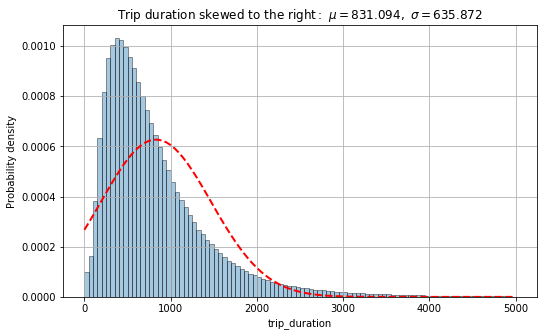

,count,mean,std,min,25%,50%,75%,max
trip_duration,1454732.0,831.094292,635.87218,1.0,396.0,661.0,1071.0,4999.0


In [234]:
import matplotlib.mlab as mlab

# Mean distribution
mu = train['trip_duration'].mean()

# Std distribution
sigma = train['trip_duration'].std()
num_bins = 100

# Histogram 
fig = plt.figure(figsize=(8.5, 5))
n, bins, patches = plt.hist(train['trip_duration'], num_bins, normed=1,
                           edgecolor = 'black', lw = 1, alpha = .40)
# Normal Distribution
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('trip_duration')
plt.ylabel('Probability density')

# Adding a title
plt.title(r'$\mathrm{Trip\ duration\ skewed \ to \ the \ right:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

# Statistical summary
train.describe()[['trip_duration']].transpose()

In [273]:
#train['pickup_date'] = train['pickup_datetime'].dt.date # Extract date

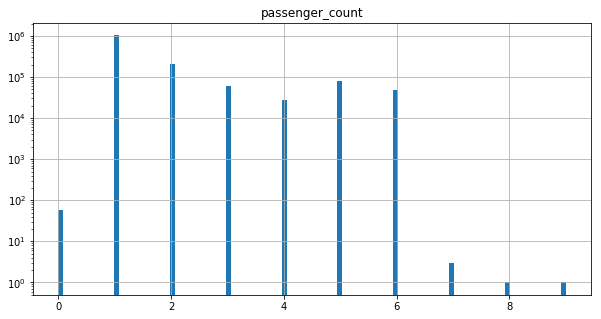

In [28]:
train['passenger_count'].hist(bins=100, log=True, figsize=(10,5));
plt.title('passenger_count')
plt.show()

In [29]:
train = train.loc[(train['passenger_count'] >= 0) & (train['passenger_count'] <= 6)]

In [30]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [31]:
train.duplicated().sum()

0

In [32]:
train = train.drop_duplicates()
train.duplicated().sum()

0

In [33]:
train.drop(["store_and_fwd_flag"], axis=1, inplace=True)
test.drop(["store_and_fwd_flag"], axis=1, inplace=True)

In [34]:
train.shape, test.shape

((1454727, 10), (625134, 8))

# FEATURE ENGINEERING

In [37]:
plg, plt = 'pickup_longitude', 'pickup_latitude'
dlg, dlt = 'dropoff_longitude', 'dropoff_latitude'
pdt, ddt = 'pickup_datetime', 'dropoff_datetime'

In [38]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def euclidian_distance(x):
    x1, y1 = np.float64(x[plg]), np.float64(x[plt])
    x2, y2 = np.float64(x[dlg]), np.float64(x[dlt])    
    return haversine(x1, y1, x2, y2)

# Creating new colums using available data

In [39]:
%time
train['distance'] = train[[plg, plt, dlg, dlt]].apply(euclidian_distance, axis=1)

Wall time: 0 ns


In [40]:
%time
test['distance'] = test[[plg, plt, dlg, dlt]].apply(euclidian_distance, axis=1)

Wall time: 0 ns


In [41]:
train[pdt] = train[pdt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
train[ddt] = train[ddt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [42]:
test[pdt] = test[pdt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [43]:
train['month'] = train[pdt].apply(lambda x : x.month)
train['week_day'] = train[pdt].apply(lambda x : x.weekday())
train['day_month'] = train[pdt].apply(lambda x : x.day)
train['pickup_time_minutes'] = train[pdt].apply(lambda x : x.hour * 60.0 + x.minute)

In [44]:
test['month'] = test[pdt].apply(lambda x : x.month)
test['week_day'] = test[pdt].apply(lambda x : x.weekday())
test['day_month'] = test[pdt].apply(lambda x : x.day)
test['pickup_time_minutes'] = test[pdt].apply(lambda x : x.hour * 60.0 + x.minute)

In [45]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,week_day,day_month,pickup_time_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498521,3,0,14,1044.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805507,6,6,12,43.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385098,1,1,19,695.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485498,4,2,6,1172.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188588,3,5,26,810.0


In [46]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,week_day,day_month,pickup_time_minutes
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,2.746426,6,3,30,1439.0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,2.759239,6,3,30,1439.0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1.306155,6,3,30,1439.0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,5.269088,6,3,30,1439.0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0.960842,6,3,30,1439.0


In [47]:
train.shape, test.shape


((1454727, 15), (625134, 13))

Setting X and Y for training and testing

In [50]:
features_train = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "month", "week_day", "day_month", "pickup_time_minutes"]
X = train[features_train]
y = np.log1p(train["trip_duration"])

features_test = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "month", "week_day", "day_month", "pickup_time_minutes"]
X_test = test[features_test]

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1163781, 11), (1163781,), (290946, 11), (290946,))

# Checking the best model for our data

In [196]:
#  Import model
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(X_train,y_train)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Decision Tree Regression Performance Metrics
R^2= 0.5642145101675826
MAE: 0.35472129433441907
MSE: 0.25899362964121575
RMSE: 0.5089141672632191


In [197]:
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Linear Regression Performance Metrics
R^2= 0.4401972363516463
MAE: 0.43018370767301534
MSE: 0.33269767120933524
RMSE: 0.5767995069426943


In [198]:
from sklearn.ensemble import RandomForestRegressor 

# Instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Random Forest Regression Performance Metrics
R^2 = 0.779052015003478
MAE 0.25039351447934194
MSE 0.13131381451152296
RMSE 0.36237248034518704


# Applying Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor 

In [54]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features='auto', max_depth=50, bootstrap=True, n_jobs=-1)

In [55]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [310]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve
#metrics.plot_roc_curve(rf, X_test, y_test)
#plt.show()

In [71]:
prediction = rf.predict(X_test)
prediction = np.exp(prediction) - np.ones(len(prediction)) 

In [69]:
prediction.shape

(290946,)

In [68]:
submis_smp = pd.read_csv('C:/Users/Raj/Downloads/Data Mining/sample_submission.csv')
submis_smp.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [62]:
submis_smp.shape

(625134, 2)

In [75]:
my_submission = pd.DataFrame({'id': submis_smp.id, 'trip_duration': prediction})

In [77]:
my_submission

,id,trip_duration
0,id3004672,766.073815
1,id3505355,584.789966
2,id1217141,422.103721
3,id2150126,1196.376384
4,id1598245,363.816789
...,...,...
625129,id3008929,249.212697
625130,id3700764,1136.798032
625131,id2568735,1410.179786
625132,id1384355,1995.222693


In [79]:
my_submission.to_csv('Withfeature.csv', index=False)